#### Import all necessary modules

In [2]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import time
import matplotlib.pyplot as plt

#### (Formatting only necessary for a specific part below)

In [3]:
pd.options.display.float_format = "{:.1f}".format

#### Function for getting headers from table on webpage

In [4]:
def get_headers(soup):
    headers = []
    table = soup.find("table", class_="a-bordered a-horizontal-stripes a-size-base a-span12 mojo-body-table mojo-table-annotated")
    for th in table.find_all("th"):
        headers.append(th.text.strip())

    return(headers)

#### Function for getting rows from table on webpage

In [5]:
def get_rows(soup):
    rows = []
    table = soup.find("table", class_="a-bordered a-horizontal-stripes a-size-base a-span12 mojo-body-table mojo-table-annotated")
    for tr in table.find_all("tr")[1:]:
        cells = tr.find_all("td")
        row = [cell.text.strip() for cell in cells]
        rows.append(row)

    return(rows)

#### Function for getting the url response

In [6]:
def get_web_page(url):
    response = requests.get(url)
    status = response.status_code
    if status == 200:
        return response.text
    else:
        print(f"Error: Status Code ({status})")
        return ""

#### Initialize variables and data frame used in code

In [7]:
start_year = 2024
num_years = 5
box_office_df = pd.DataFrame()

#### For loop to gather multiple webpage's data, and concat them to the data frame

In [8]:
for year in range(start_year, start_year - num_years, -1):
    print(f"Data for {year}")
    url = f"https://www.boxofficemojo.com/year/world/{year}/"
    
    html = get_web_page(url)
    soup = bs(html)
    headers = get_headers(soup)
    rows = get_rows(soup)

    year_df = pd.DataFrame(rows, columns=headers)
    year_df["year"] = year

    box_office_df = pd.concat([box_office_df, year_df], ignore_index=True)
    
    time.sleep(5)

Data for 2024
Data for 2023
Data for 2022
Data for 2021
Data for 2020


#### Display work

In [9]:
box_office_df.head()

,Rank,Release Group,Worldwide,Domestic,%,Foreign,%,year
0,1,Inside Out 2,"$1,698,217,953","$652,980,194",38.5%,"$1,045,237,759",61.5%,2024
1,2,Deadpool & Wolverine,"$1,337,900,827","$636,745,858",47.6%,"$701,154,969",52.4%,2024
2,3,Despicable Me 4,"$968,240,710","$361,004,205",37.3%,"$607,236,505",62.7%,2024
3,4,Dune: Part Two,"$714,444,358","$282,144,358",39.5%,"$432,300,000",60.5%,2024
4,5,Godzilla x Kong: The New Empire,"$571,750,016","$196,350,016",34.3%,"$375,400,000",65.7%,2024


In [10]:
box_office_df.tail()

,Rank,Release Group,Worldwide,Domestic,%,Foreign,%,year
995,196,The Empty Man,"$4,796,993","$2,992,948",62.4%,"$1,804,045",37.6%,2020
996,197,The Vets,"$4,788,826",-,-,"$4,788,826",100%,2020
997,198,The Broken Hearts Gallery,"$4,781,389","$4,067,442",85.1%,"$713,947",14.9%,2020
998,199,Gladiator 20th Anniversary,"$4,780,585",-,-,"$4,780,585",100%,2020
999,200,Intruder,"$4,751,103",-,-,"$4,751,103",100%,2020


In [11]:
box_office_df

,Rank,Release Group,Worldwide,Domestic,%,Foreign,%,year
0,1,Inside Out 2,"$1,698,217,953","$652,980,194",38.5%,"$1,045,237,759",61.5%,2024
1,2,Deadpool & Wolverine,"$1,337,900,827","$636,745,858",47.6%,"$701,154,969",52.4%,2024
2,3,Despicable Me 4,"$968,240,710","$361,004,205",37.3%,"$607,236,505",62.7%,2024
3,4,Dune: Part Two,"$714,444,358","$282,144,358",39.5%,"$432,300,000",60.5%,2024
4,5,Godzilla x Kong: The New Empire,"$571,750,016","$196,350,016",34.3%,"$375,400,000",65.7%,2024
...,...,...,...,...,...,...,...,...
995,196,The Empty Man,"$4,796,993","$2,992,948",62.4%,"$1,804,045",37.6%,2020
996,197,The Vets,"$4,788,826",-,-,"$4,788,826",100%,2020
997,198,The Broken Hearts Gallery,"$4,781,389","$4,067,442",85.1%,"$713,947",14.9%,2020
998,199,Gladiator 20th Anniversary,"$4,780,585",-,-,"$4,780,585",100%,2020


### Data Frame Cleaning

**Use columns to get list of names, then create dictionary to change them**

In [12]:
box_office_df.columns

Index(['Rank', 'Release Group', 'Worldwide', 'Domestic', '%', 'Foreign', '%',
       'year'],
      dtype='object')

In [13]:
column_names = {'Rank':"rank", 'Release Group':"title", 'Worldwide':"world",
                'Domestic':"domestic", 'Foreign':"foreign"}
for k,v in column_names.items():
    box_office_df.rename(columns=({k:v}), inplace=True)

In [14]:
columns = box_office_df.columns.tolist()
columns[4] = "dom %"
columns[6] = "for %"
box_office_df.columns = columns

**Make all names lower case**

In [15]:
box_office_df["title"] = box_office_df["title"].str.lower()

**Fill in any missing data**

In [16]:
column_cleaning = ["world", "domestic", "dom %", "foreign", "for %"]
for v in column_cleaning:
    box_office_df[v] = box_office_df[v].replace("-",0)

**Adjust columns to be proper data types (eg. worldwide income from a string with $ to a )**

In [17]:
money_list = ["world", "domestic", "foreign"]
percent_list = ["dom %", "for %"]
for v in money_list:
    box_office_df[v] = box_office_df[v].str.replace("$", "", regex=False)
    box_office_df[v] = box_office_df[v].str.replace(",", "", regex=False)
    box_office_df[v] = pd.to_numeric(box_office_df[v], errors="coerce", downcast="integer")

for v in percent_list:
    box_office_df[v] = box_office_df[v].str.replace("%", "", regex=False)
    box_office_df[v] = pd.to_numeric(box_office_df[v], errors="coerce", downcast="float")

box_office_df.fillna(0, inplace=True)
box_office_df["domestic"] = box_office_df["domestic"].astype(int)
box_office_df["foreign"] = box_office_df["foreign"].astype(int)

In [18]:
box_office_df

,rank,title,world,domestic,dom %,foreign,for %,year
0,1,inside out 2,1698217953,652980194,38.5,1045237759,61.5,2024
1,2,deadpool & wolverine,1337900827,636745858,47.6,701154969,52.4,2024
2,3,despicable me 4,968240710,361004205,37.3,607236505,62.7,2024
3,4,dune: part two,714444358,282144358,39.5,432300000,60.5,2024
4,5,godzilla x kong: the new empire,571750016,196350016,34.3,375400000,65.7,2024
...,...,...,...,...,...,...,...,...
995,196,the empty man,4796993,2992948,62.4,1804045,37.6,2020
996,197,the vets,4788826,0,0.0,4788826,100.0,2020
997,198,the broken hearts gallery,4781389,4067442,85.1,713947,14.9,2020
998,199,gladiator 20th anniversary,4780585,0,0.0,4780585,100.0,2020


### Graphs

#### *What were the top 50 best performing movies over the past 5 years?*

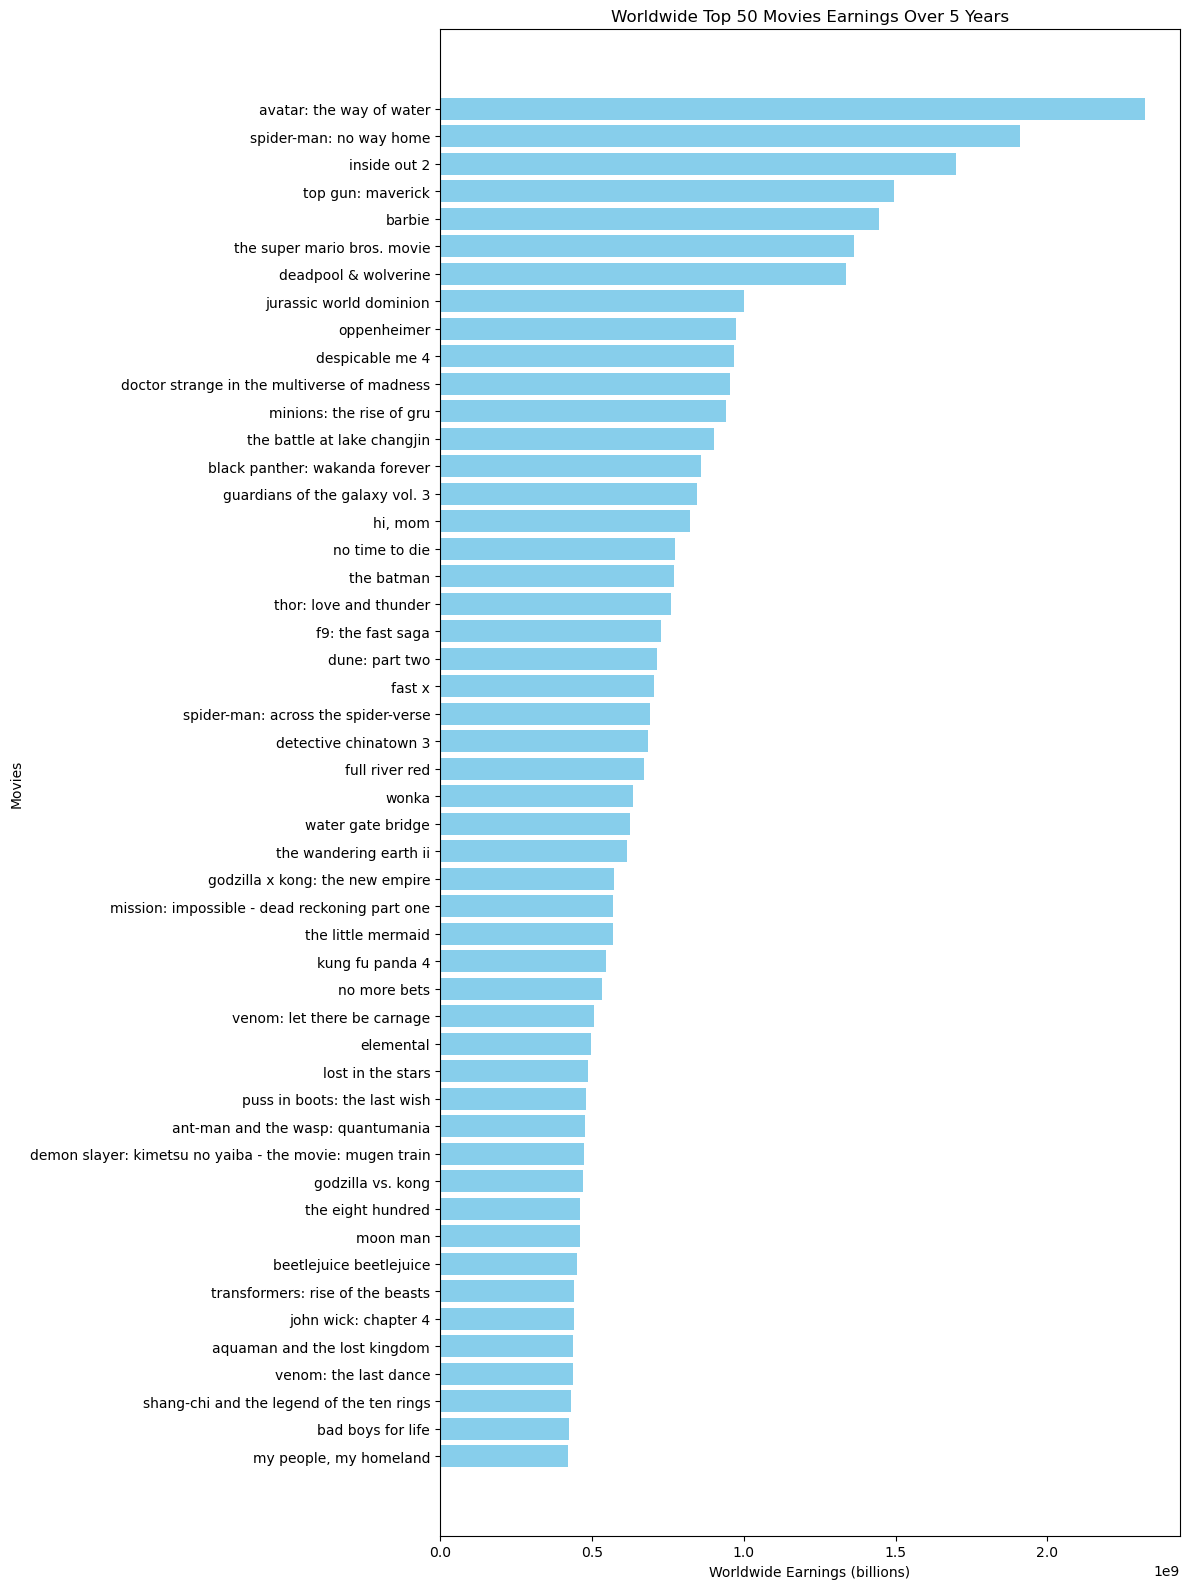

In [19]:
top_50 = box_office_df.nlargest(50, "world")

plt.figure(figsize=(12, 16))
plt.barh(top_50["title"], top_50["world"], color="skyblue")
plt.xlabel("Worldwide Earnings (billions)")
plt.ylabel("Movies")
plt.title("Worldwide Top 50 Movies Earnings Over 5 Years")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

#### *What is the average percentage split between Domestic and Foreign earnings over 5 years?*

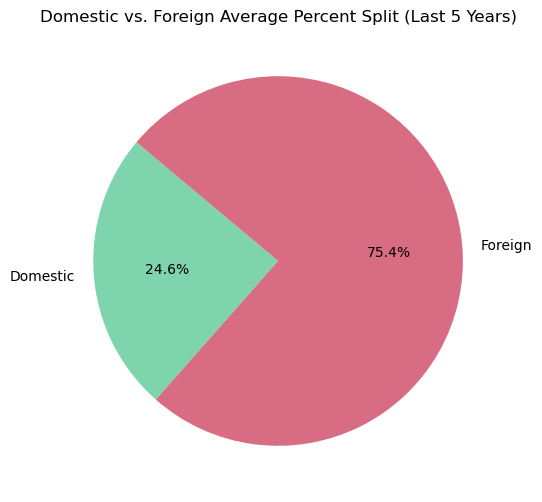

In [20]:
total_dom_percent = box_office_df["dom %"].mean()
total_for_percent = box_office_df["for %"].mean()

plt.figure(figsize=(6, 6))
plt.pie([total_dom_percent, total_for_percent], labels=["Domestic", "Foreign"], autopct="%1.1f%%",
       startangle=140, colors=["#7ED4AD", "#D76C82"])
plt.title("Domestic vs. Foreign Average Percent Split (Last 5 Years)")
plt.show()

In [21]:
box_office_df.to_csv("project2_part2.csv")